## EDA

The main purpose of this notebook is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, find interesting relations among the variables.

### Step 1 | Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

C:\Users\FPT Shop\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


### Step 2 | Read the dataset

In [2]:
train_df = pd.read_csv('data\\train_data.csv')

### Step 3 | EDA


#### 3.1 | Univariate Analysis

In [3]:
continuous_features = ['Weight', 'Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in train_df.columns if feature not in continuous_features]

# Convert the identified features to object data type
train_df[features_to_convert] = train_df[features_to_convert].astype('object')

train_df.dtypes

df_continuous = train_df[continuous_features]

In [4]:
def dist_by_NObeyesdad(df, col):

    # Create a histogram with KDE
    plt.figure(figsize=(12, 8))
    ax = sns.histplot(data=df, x=col, multiple="stack", bins=20, kde=True)

    # Add numbers on each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    # Set plot labels and title
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')

    # Show the plot
    plt.show()


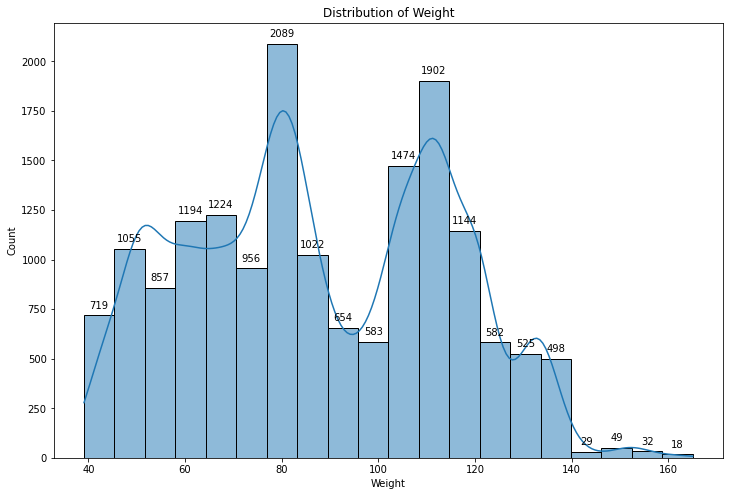

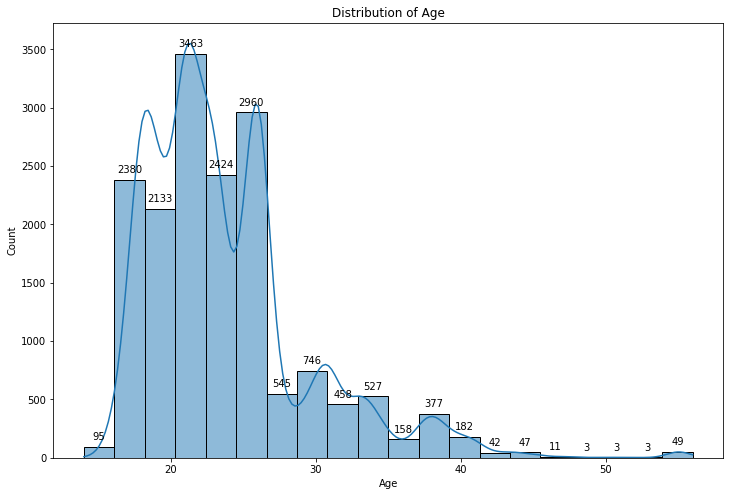

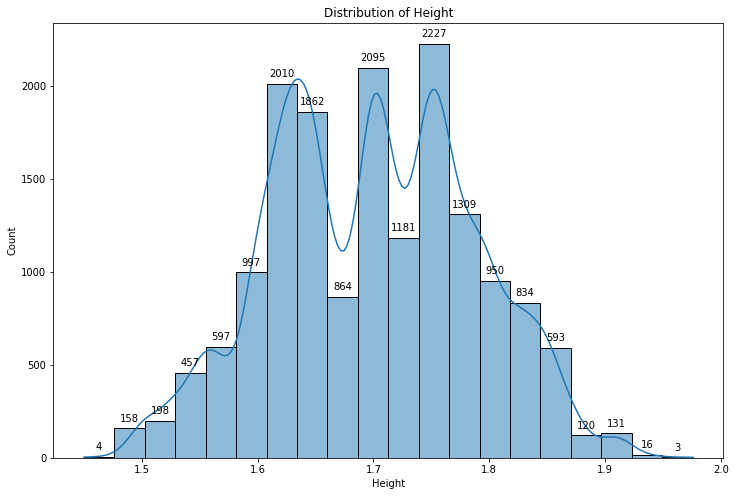

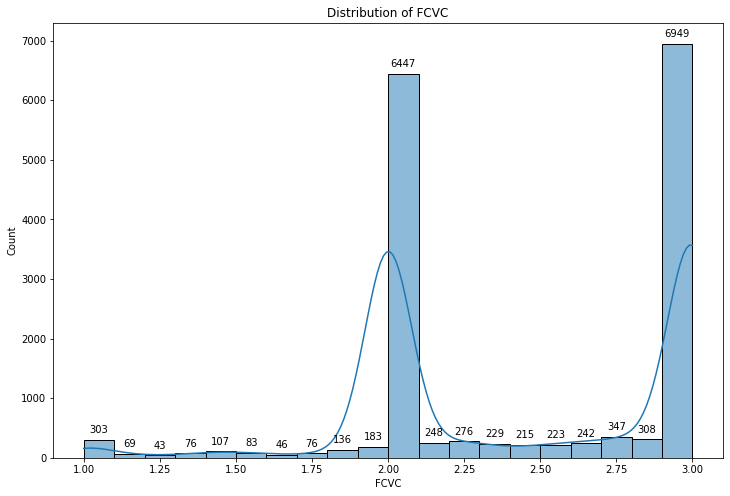

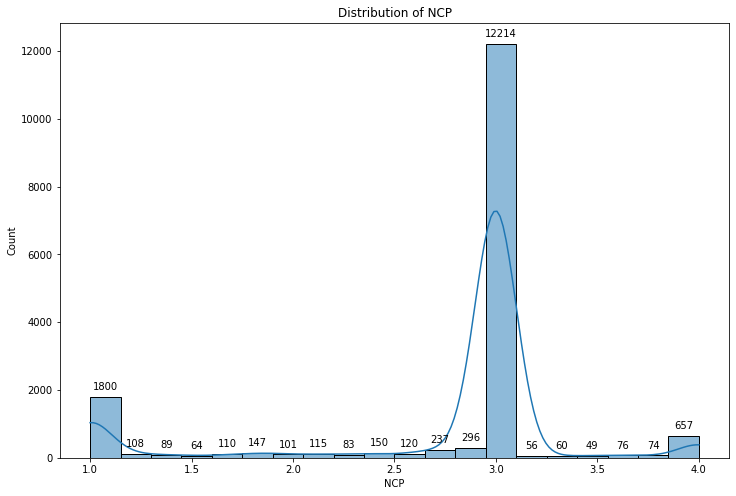

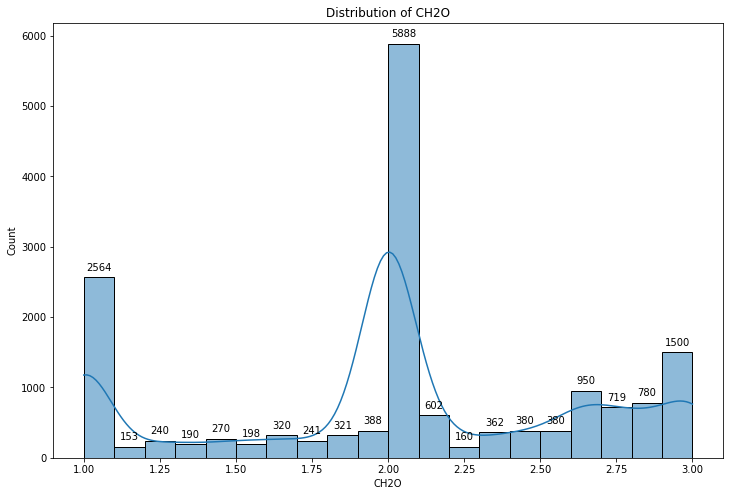

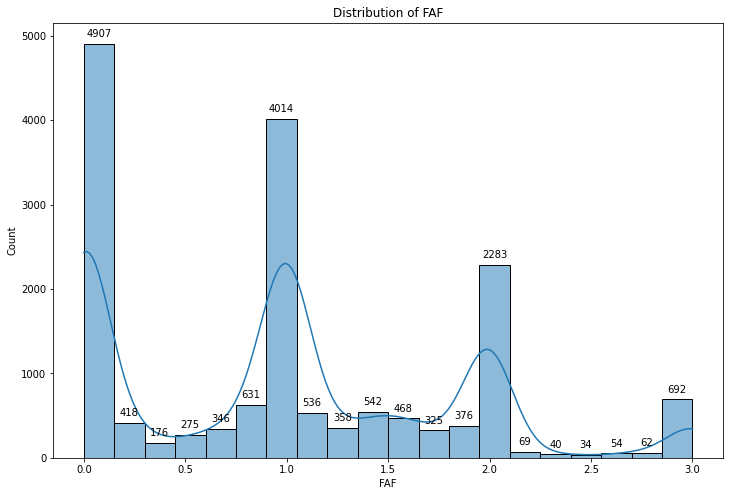

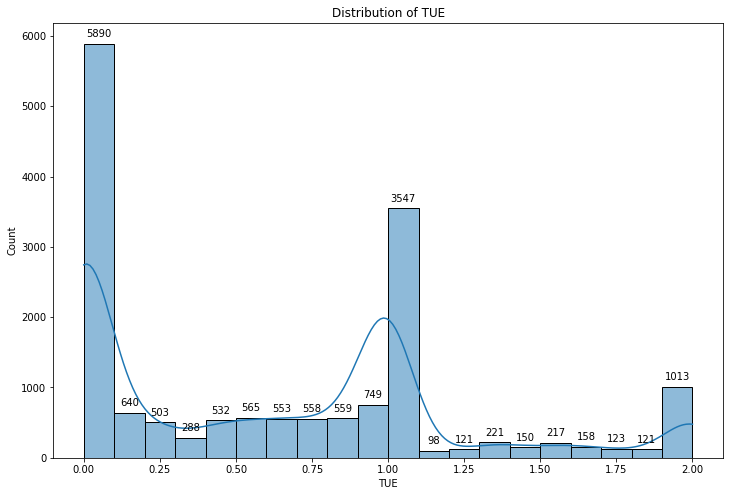

In [5]:
for i, col in enumerate(df_continuous.columns):
    dist_by_NObeyesdad(train_df, col)

Inferences:
- People have different levels of Weight. 80 is the weight which most people have.
- Most of the values of Age are concentrated towards 21. 
- The Height for most individuals is concentrated around 1.75m.
- FCVC, NCP, CH2O, FAF and TUE focus on only few values.

In [6]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
df_categorical = train_df[categorical_features]

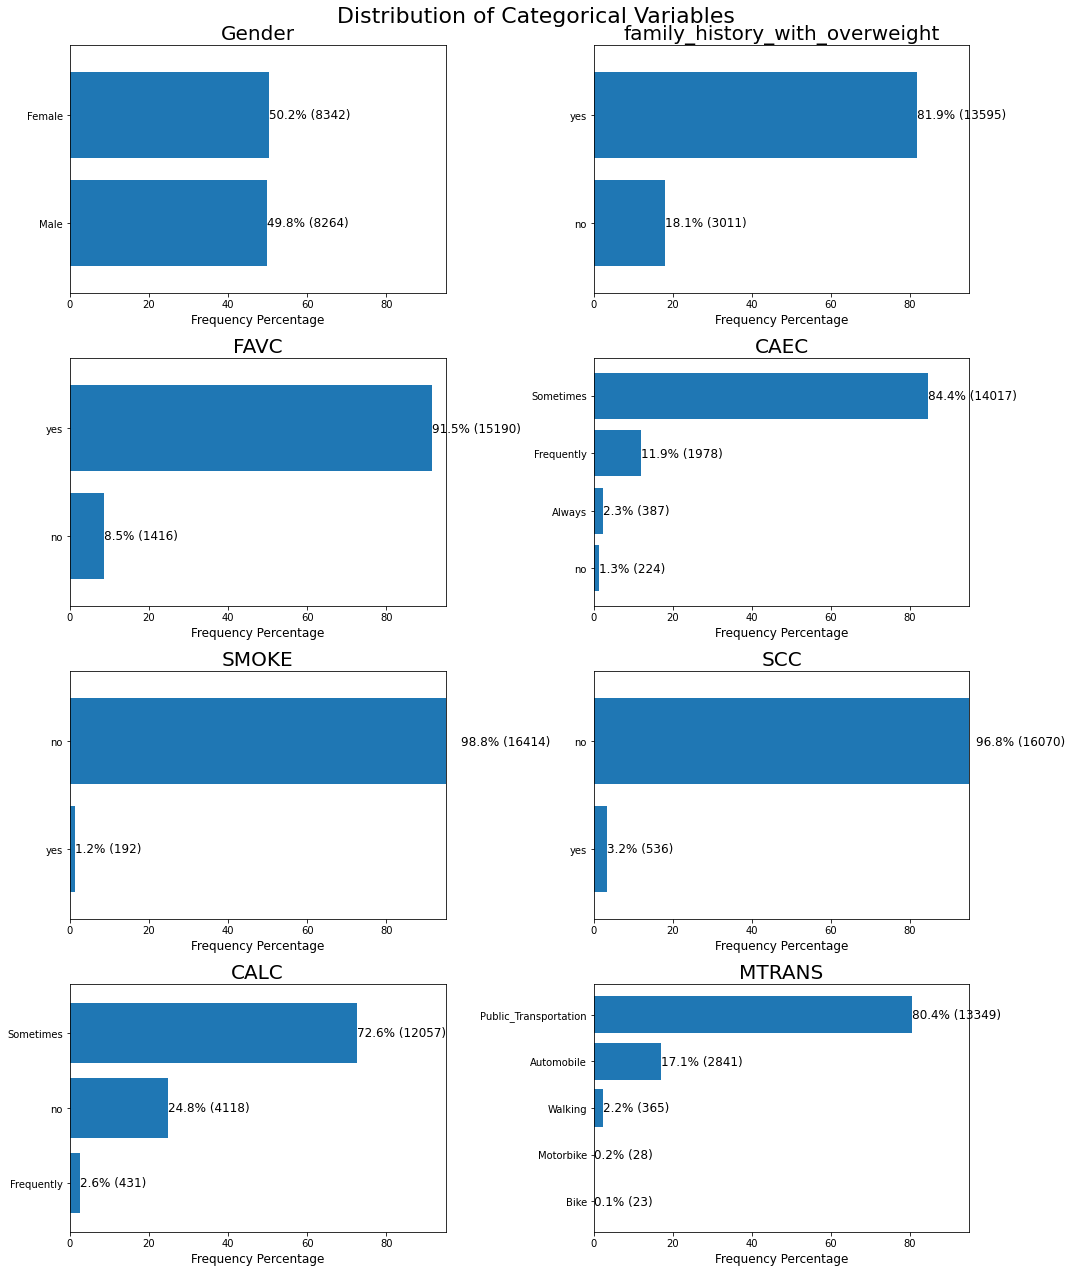

In [7]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = train_df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8)

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, f'{str(round(value, 1))}% ({train_df[col].value_counts()[value_counts.index[index]]})',
                               fontsize=12, va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Set the title for the entire plot
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Inferences:
- Gender distributes fairly.
- 81.9% of people have family history with overweight.
- Most people (91.5%) consume high-caloric food items.
- A large number of people have food between meals, at 84.4%.
- Almost no one smoke or monitor their calorie consumption.
- 72.6% of people sometimes consume alcohol.
- Most people use public transportation (80.4%).

#### 3.2 | Bivariate Analysis

In [8]:
# categorical_features = [feature for feature in categorical_features if feature != 'NObeyesdad']
# Set the target order
target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

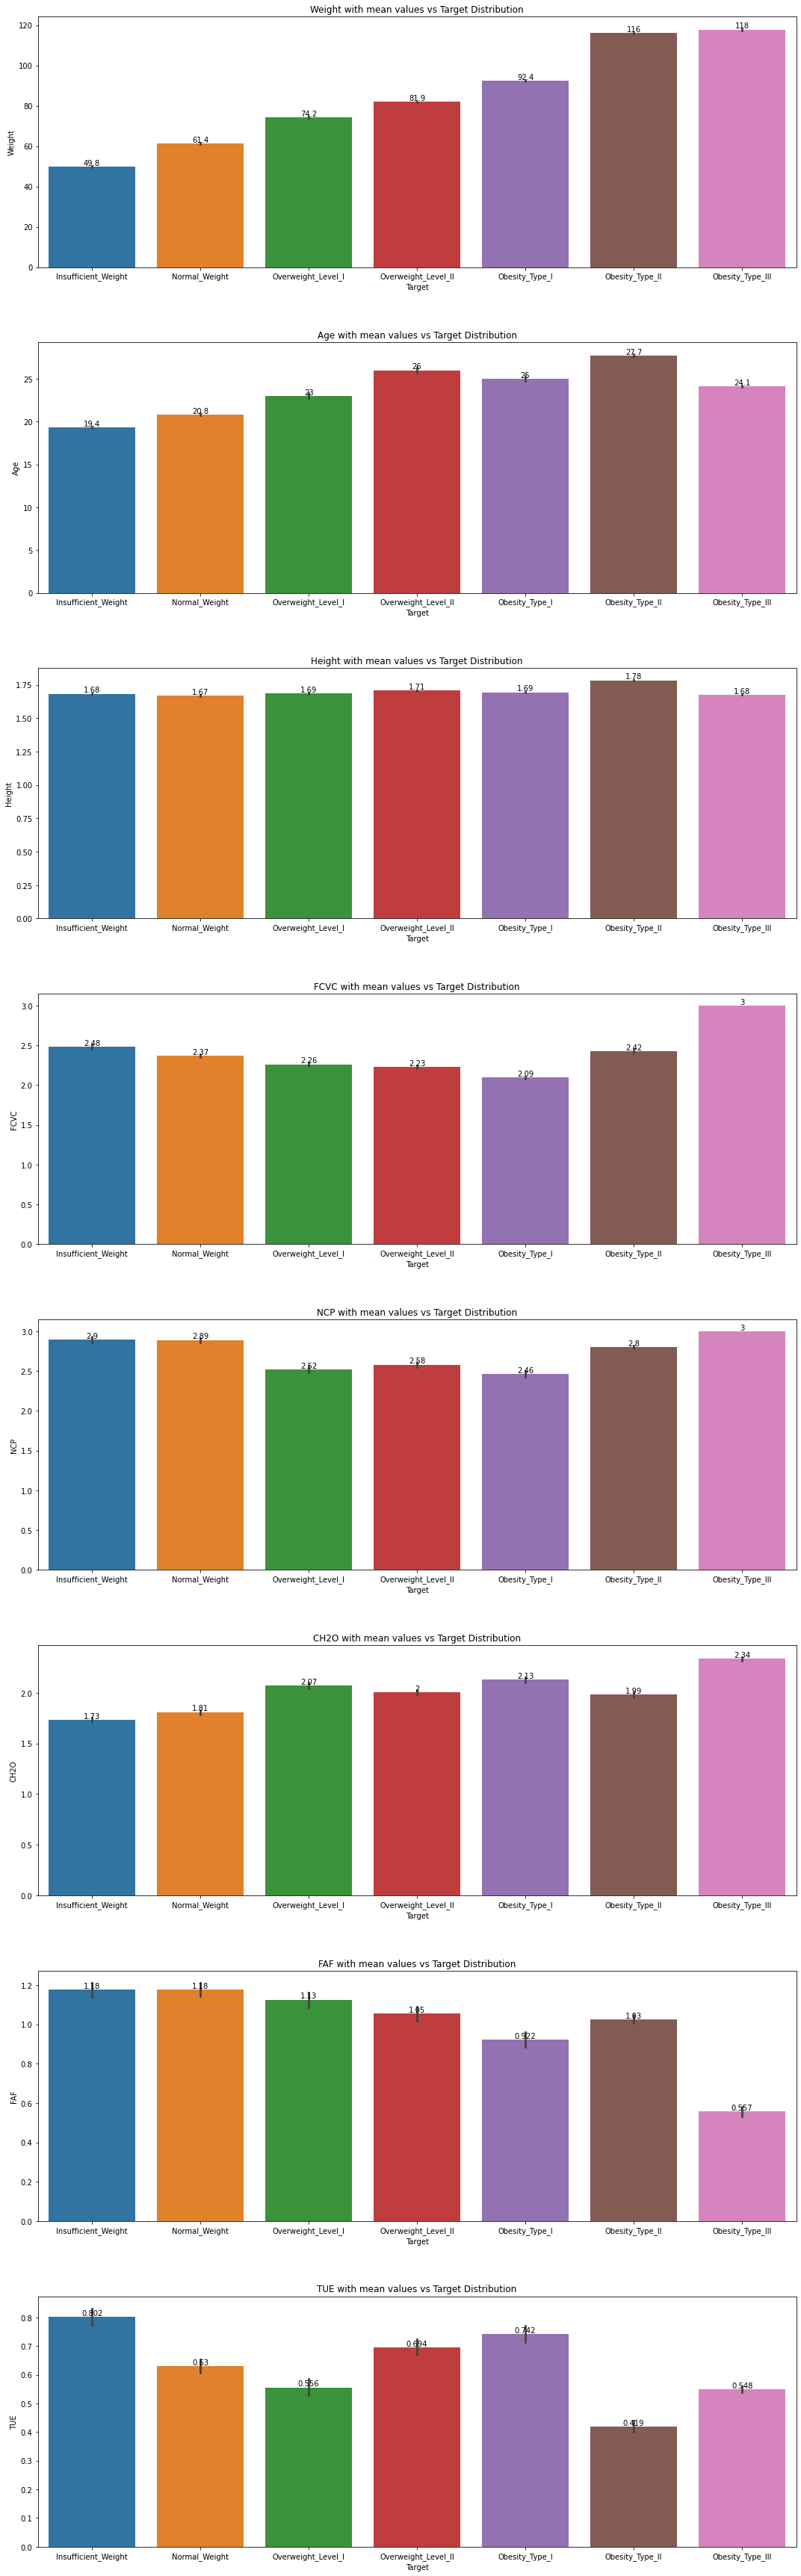

In [9]:
# Loop through each continuous feature
# Create a new figure with subplots
fig, axs = plt.subplots(len(continuous_features), figsize=(15, 6 * len(continuous_features)))
# Iterate through each continuous feature
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    sns.barplot(data=train_df, x="NObeyesdad", y=col, order=target_order, ax=axs[i])

    # Add mean values to the barplot
    for cont in axs[i].containers:
        axs[i].bar_label(cont, fmt='%.3g')

    # Set the title and labels
    axs[i].set_title(f'{col} with mean values vs Target Distribution')
    axs[i].set_xlabel('Target')
    axs[i].set_ylabel(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

# kdeplot
# fig, ax = plt.subplots(len(continuous_features), 1, figsize=(15, 6*len(continuous_features)))

# # Loop through each continuous feature to create kde plots
# for i, col in enumerate(continuous_features):
#     # KDE plot showing the distribution of the feature for each target category
#     for target_label in target_order:
#         sns.kdeplot(data=train_df[train_df["NObeyesdad"] == target_label], x=col, fill=True, linewidth=2, ax=ax[i], label=target_label, warn_singular=False)

#     ax[i].set_ylabel(col)
#     ax[i].set_title(f'{col} vs Target Distribution')
#     ax[i].legend(title='Target', loc='upper right')
#     ax[i].set_yticks([])

# # Set the title for the entire figure
# plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
# plt.tight_layout()
# plt.show()


Inferences:
- The higher the weight, the higher the chance that people are obese, but it might also depend on height.
- People tend to have obisity as they get older.
- Height affects the chance to get obisity quite fairly, indicating limited differentiating power for this feature.
- People who consume more vegetables, water have less chance of getting fat.
- People with obesity type I have the smallest number of meals per day. In contrast, people with insufficient and normal weight still have about 2.9 meals/day.
- Taking in physical activities helps reducing chance of getting obesity.
- Spending too much time using technology devices can lead to insufficient weight.


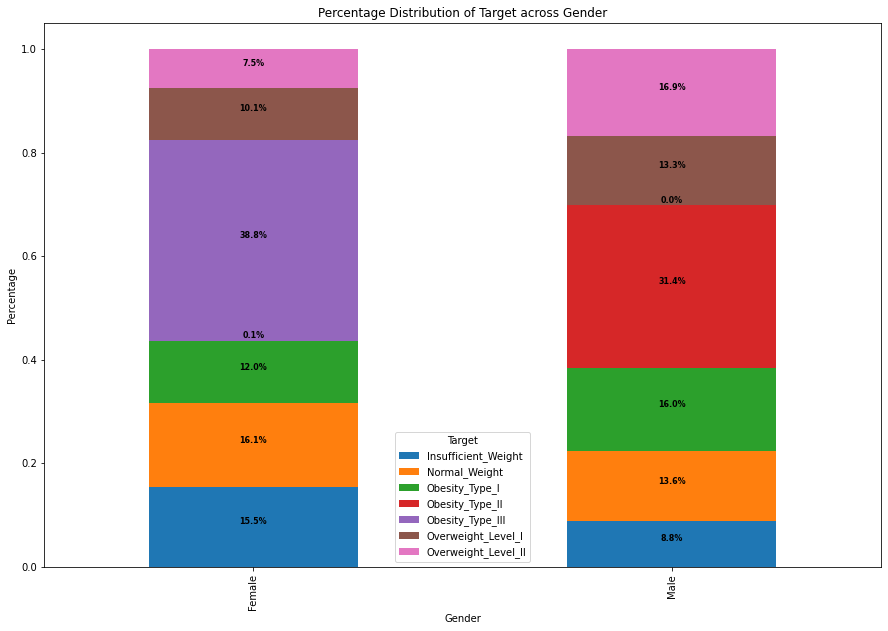

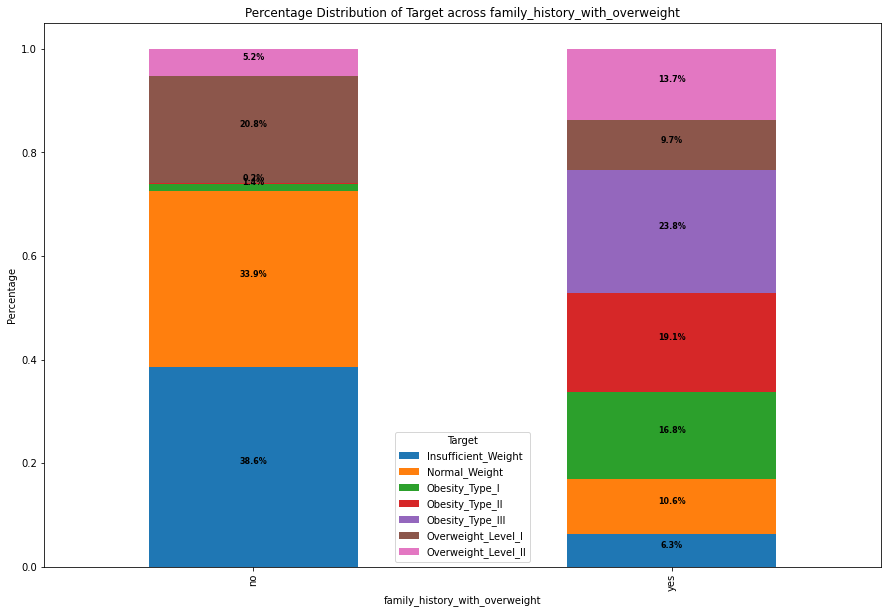

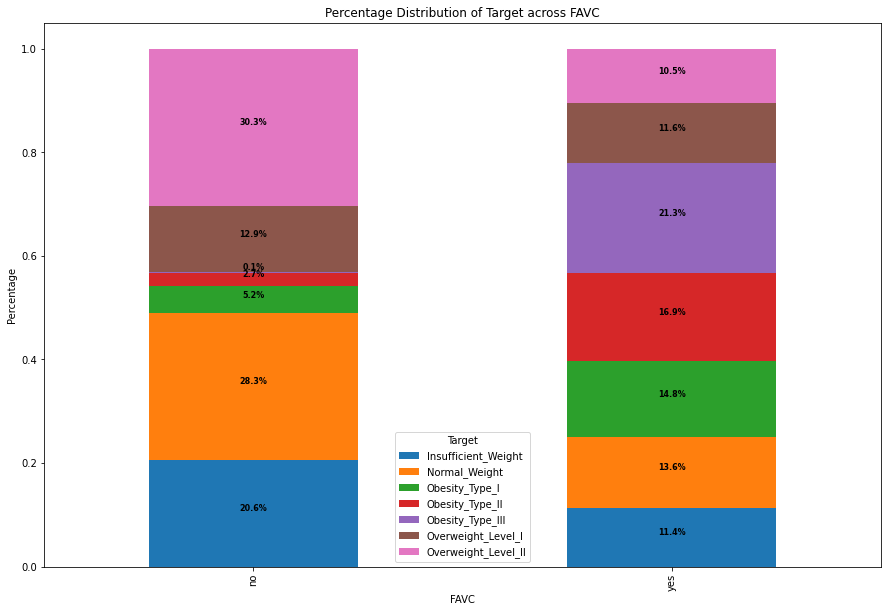

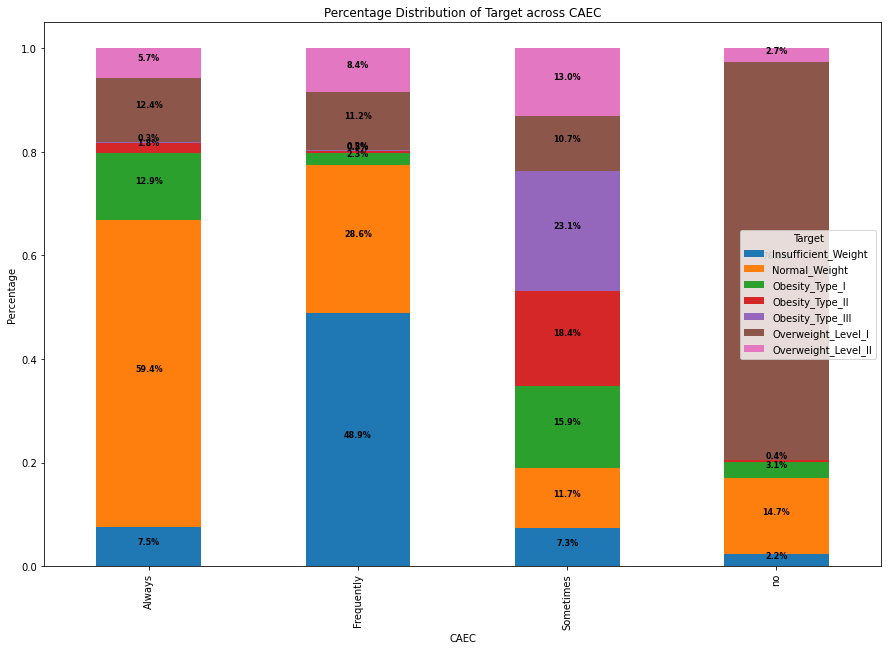

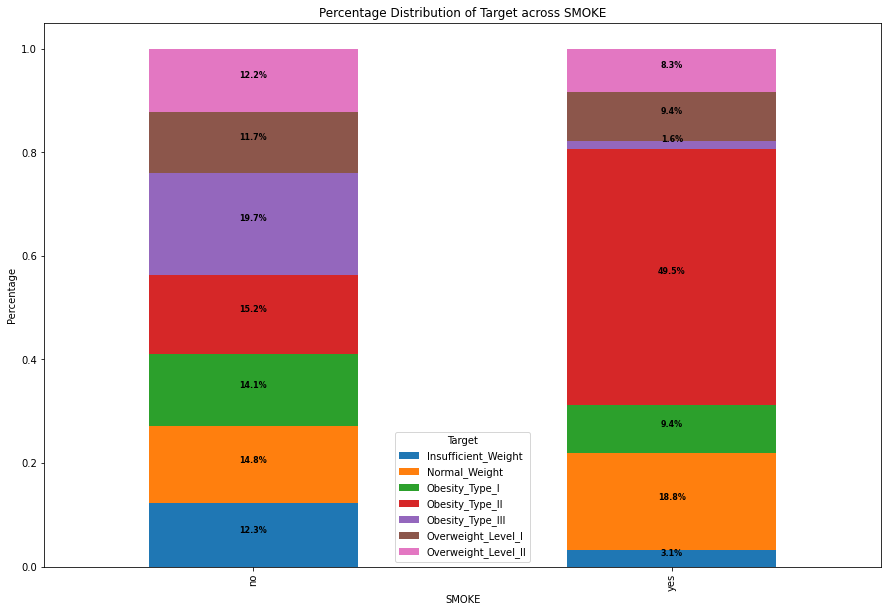

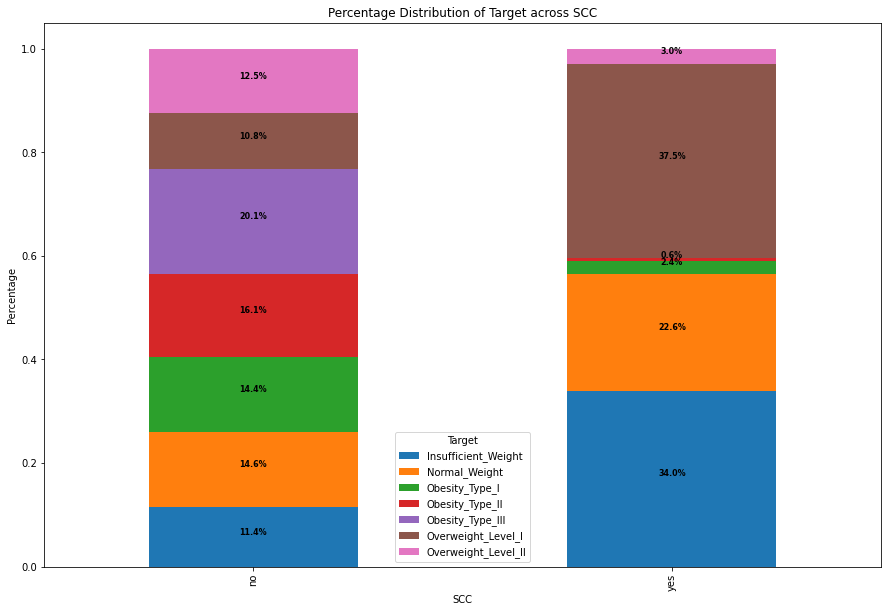

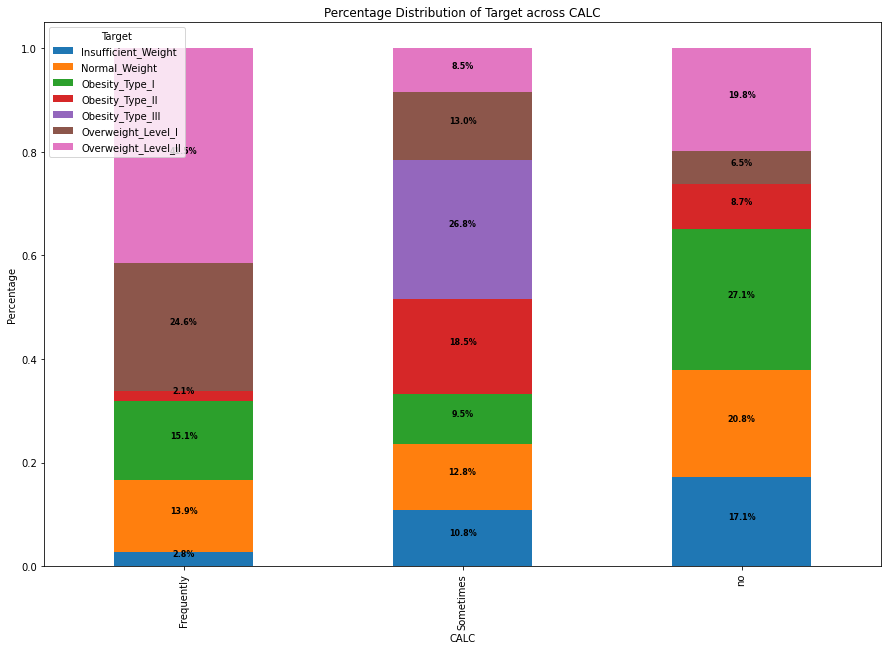

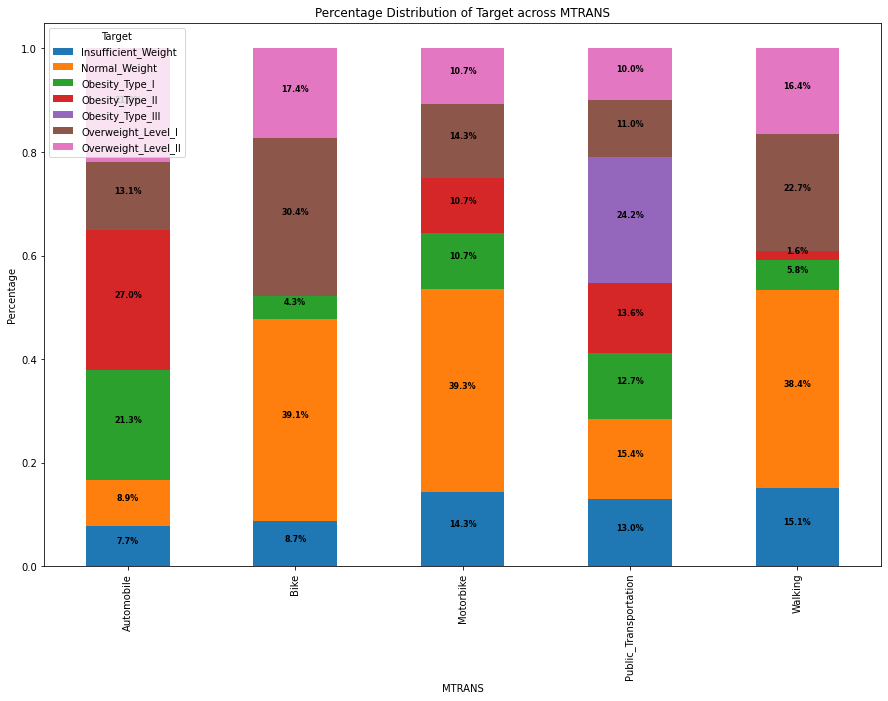

In [10]:
# Bar plot for each categorical feature
# fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

# # Loop through each categorical feature
# for i, c in enumerate(categorical_features):
#     row = i // 2  # Calculate the row index
#     col = i % 2   # Calculate the column index

#     # Create a count plot for the current categorical feature
#     sns.countplot(data=train_df, x=c, hue="NObeyesdad", ax=ax[row, col])

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()

# Iterate through each categorical column and create a stacked bar plot
for col in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(train_df[col], train_df['NObeyesdad'], normalize='index')
    
    # Set style and plot the bar chart
    ax = contingency_table.plot(kind="bar", stacked=True, figsize=(15, 10))
    
    # Set plot labels and title
    plt.title(f"Percentage Distribution of Target across {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(title="Target")
    
    # Annotate each part of each bar with percentage and count
    for bar in ax.containers:
        for rect in bar:
            # Get the height of the bar
            height = rect.get_height()
            # Get the x and y coordinates of the bar
            x, y = rect.get_xy()
            # Calculate the count
            count = height * contingency_table.sum(axis=1)[int(x)]
            # Check if the percentage is greater than 0
            if height > 0:
                # Annotate the bar with percentage and count
                ax.annotate(f'{height * 100:.1f}%', 
                            (rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                            ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                            textcoords='offset points', weight='bold')
    
    # Show the plot
    plt.show()



Inferences:
- Female tends to get obesity type III, while male tends to get obesity type II.
- Family history can affect people's weight.
- People who consume high caloric food tend to get obesity type III.
- People who do not consume food between meals have a high chance of getting overweight level I.
- Smoking can result in obesity type II.
- People who do monitor their calorie consumption tend to have overweight level I or insufficient weight.
- Drinking alcohol frequently can lead to overweight level II.
- People who travel by public transportation have a high chance to get obesity type III.